In [9]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing import image
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.optimizers import SGD, Adam

TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [7]:
pip list

Package                       Version
----------------------------- ---------------
absl-py                       1.4.0
aiohttp                       3.8.4
aiosignal                     1.3.1
alabaster                     0.7.12
altair                        5.0.1
altgraph                      0.17.3
anaconda-client               1.11.2
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
asgiref                       3.7.2
aspose-words                  23.7.0
astor                         0.8.1
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-generator               1.10
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8 

In [38]:
#tf.test.is_gpu_available()

True

In [11]:
#sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device



In [2]:
#定義子資料夾名稱&對應的數字，檔名不能有中文
class_names = ['cat','dog']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (200, 200)

def load_data():
    datasets = ['train', 'test']#資料夾
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                #cv讀照片，顏色莫認為BGR，需轉為RGB，錯誤表示黑白或已轉
                image = cv2.resize(image, IMAGE_SIZE)  
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

(train_images, train_labels), (test_images, test_labels) = load_data()

Loading train


100%|███████████████████████████████████████████████████████████████████████████| 10430/10430 [00:58<00:00, 178.05it/s]


Loading test


100%|█████████████████████████████████████████████████████████████████████████████| 2070/2070 [00:11<00:00, 184.95it/s]


In [3]:
#隨機性
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)
#標準化
train_images = train_images / 255.0 
test_images = test_images / 255.0
#建模
input_shape = (200, 200, 3)

model = Sequential([
    Conv2D(64, (3, 3), input_shape=input_shape, padding='same',#卷積層1
           activation='relu', strides=2),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Dropout(0.2),
    
    Conv2D(128, (3, 3), input_shape=input_shape, padding='same',#卷積層2
           activation='relu', strides=2),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Dropout(0.2),
    
    Conv2D(256, (3, 3), input_shape=input_shape, padding='same',#卷積層3
           activation='relu', strides=2),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Dropout(0.2),
    
    Flatten(),#平坦層
    
    Dense(units=512, activation='relu'),#隱藏層1
    Dropout(0.2),
    
    Dense(units=512, activation='relu'),#隱藏層2
    Dropout(0.5),
    
    Dense(2, activation='softmax') #輸出層，分類用softmax，只分貓狗是2
])
model.compile(optimizer = 'adam', #SGD(lr=0.1)
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
history = model.fit(x=train_images,y=train_labels,epochs=20,batch_size=128,verbose=1)

Epoch 1/20
163/163 [==============================] - 106s 645ms/step - loss: 0.6891 - accuracy: 0.5240
Epoch 2/20
163/163 [==============================] - 101s 621ms/step - loss: 0.5960 - accuracy: 0.6703
Epoch 3/20
163/163 [==============================] - 102s 625ms/step - loss: 0.5157 - accuracy: 0.7399
Epoch 4/20
163/163 [==============================] - 101s 620ms/step - loss: 0.4649 - accuracy: 0.7763
Epoch 5/20
163/163 [==============================] - 107s 655ms/step - loss: 0.4187 - accuracy: 0.8082
Epoch 6/20
163/163 [==============================] - 102s 628ms/step - loss: 0.3853 - accuracy: 0.8265
Epoch 7/20
163/163 [==============================] - 100s 616ms/step - loss: 0.3588 - accuracy: 0.8419
Epoch 8/20
163/163 [==============================] - 101s 617ms/step - loss: 0.3268 - accuracy: 0.8557
Epoch 9/20
163/163 [==============================] - 101s 618ms/step - loss: 0.2982 - accuracy: 0.8728
Epoch 10/20
163/163 [==============================] - 101s 620m

130/130 [==============================] - 7s 49ms/step


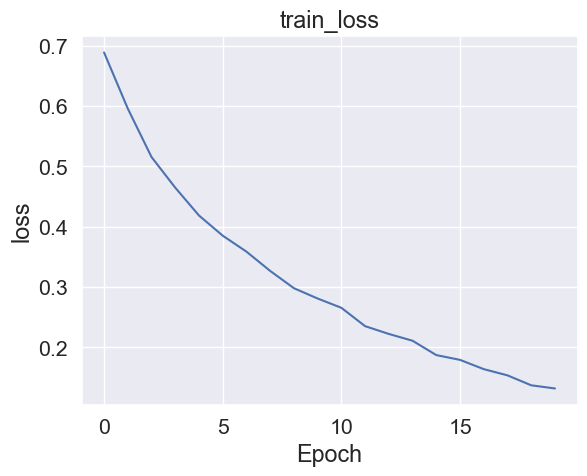

In [5]:
#模型概況
plt.title('train_loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.plot(history.history["loss"])
#scores = model.evaluate(test_images,test_labels)
#print('test:',result[1])
#預測
predictions = model.predict(test_images)#Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1)

In [6]:
CM = confusion_matrix(test_labels,pred_labels)
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements =confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements
print(accuracy(CM))

0.8565217391304348


In [7]:
CM

array([[1782,  288],
       [ 306, 1764]], dtype=int64)

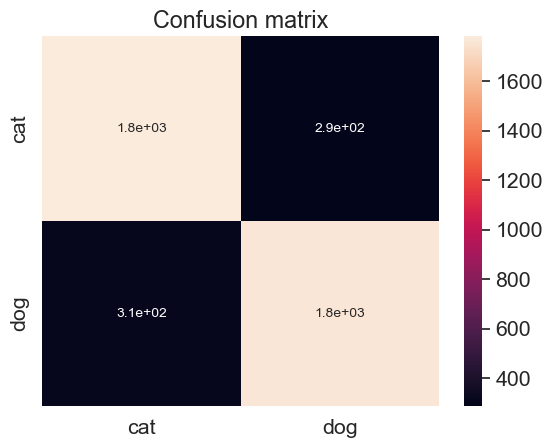

In [8]:
#混淆矩陣視覺化,看錯誤
ax = plt.axes()
sn.heatmap(CM, annot=True,
            annot_kws={"size": 10},
            xticklabels=class_names,
            yticklabels=class_names, ax = ax)
ax.set_title ('Confusion matrix')
plt.show()

In [1]:
#存模型&讀模型
model.save("85%CNN_model.h5")

NameError: name 'model' is not defined

In [4]:
from keras.models import load_model
model = load_model('85%CNN_model.h5')

TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [2]:
IMAGE_path=r'C:\\Users\\dl\\Desktop\\yc_data\\貓狗CNN練習\\test_pred\1281.jpg'
img=tf.keras.preprocessing.image.load_img(IMAGE_path,target_size=(200,200))
img=tf.keras.preprocessing.image.img_to_array(img)
plt.imshow(img/255.)

NameError: name 'tf' is not defined

In [10]:
prediction=model.predict(np.array([img]),verbose=0)
print(prediction)
if prediction[0,0]==0:
    print("一條狗")
else:
    print("貓")
    

NameError: name 'model' is not defined

In [44]:
prediction[0,0]

0.0